<a href="https://colab.research.google.com/github/PGM-Lab/2022-ProbAI/blob/main/Day2-AfterLunch/notebooks/student_simple_gaussian_model_pyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/PGM-Lab/2022-ProbAI/raw/main/Day2-AfterLunch/notebooks/Figures/simple_pyro_exercise.png">


In [ ]:
!pip install -q --upgrade pyro-ppl torch 


import numpy as np
import torch
from torch.distributions import constraints
import matplotlib.pyplot as plt

import pyro
from pyro.distributions import Normal, Gamma, MultivariateNormal
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
import pyro.optim as optim

## Generate some data

In [ ]:
# Sample data
np.random.seed(123)
N = 100
correct_mean = 5
correct_precision = 1
data = torch.tensor(np.random.normal(loc=correct_mean, scale=np.sqrt(1./correct_precision), size=N), dtype=torch.float)


## Our model specification

In [ ]:
# Fill the method with code to define a simple Gaussian model with mean \mu and precision \gamma
def model(data):
    gamma = pyro.sample("gamma", Gamma(torch.tensor(1.), torch.tensor(1.)))
    mu = pyro.sample("mu", Normal(torch.zeros(1), torch.tensor(10000.0)))
    with pyro.plate("data", len(data)):
        pyro.sample("x", Normal(loc=mu, scale=torch.sqrt(1. / gamma)), obs=data)

## Our guide specification

In [ ]:
# Define the right guide for the above model, including the variational parameters. 
def guide(data=None):


## Do learning

In [ ]:
# setup the optimizer
adam_args = {"lr": 0.01}
optimizer = Adam(adam_args)

pyro.clear_param_store()
svi = SVI(model, guide, optimizer, loss=Trace_ELBO(), num_samples=10)
train_elbo = []
# training loop
for epoch in range(3000):
    loss = svi.step(data)
    train_elbo.append(-loss)
    if (epoch % 500) == 0:
        print("[epoch %03d] average training loss: %.4f" % (epoch, loss))

[epoch 000] average training loss: 1599.6830
[epoch 500] average training loss: 546.2211
[epoch 1000] average training loss: 284.1279
[epoch 1500] average training loss: 185.3350
[epoch 2000] average training loss: 195.8745
[epoch 2500] average training loss: 178.9226


In [ ]:
for name, value in pyro.get_param_store().items():
    print(name, pyro.param(name))

rate tensor(1.8581, requires_grad=True)
conc tensor(2.1757, requires_grad=True)
mu_mean tensor(5.0201, requires_grad=True)
mu_scale tensor(0.1044, requires_grad=True)


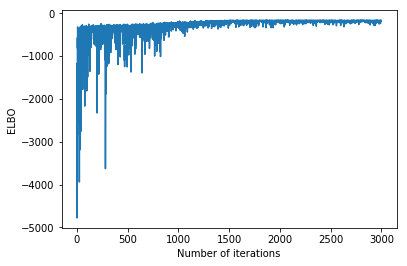

In [ ]:
plt.plot(range(len(train_elbo)), train_elbo)
plt.xlabel("Number of iterations")
plt.ylabel("ELBO")
plt.show()